Analysis of standardised raw match data.  This is to guide us in imputing any missing values and correcting any data entry mistakes.

In [16]:
# common notebook config
%run notebook-config.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
autoreload enabled
matplotlib: show plots inline
pandas imported as pd (1.2.1)
Pandas display: Remove maximum column width
Pandas display: Show up to 100 columns in tables
Pandas display: Show up to 100 rows in tables
Pandas display: Set floats to show up to 3 decimal places


In [17]:
from src.data import make_dataset
import matplotlib.pyplot as plt

In [18]:
matches = pd.read_csv("../data/interim/matches_raw.csv")

# Show random sample of records for quick check
matches.sample(10)

,date,home_team,away_team,home_goals,away_goals,result,home_shots,away_shots,home_shotsOnTarget,away_shotsOnTarget,home_corners,away_corners,home_fouls,away_fouls,home_yellowCards,away_yellowCards,home_redCards,away_redCards,odds_interwetten_homeWin,odds_interwetten_draw,odds_interwetten_awayWin,odds_williamHill_homeWin,odds_williamHill_draw,odds_williamHill_awayWin,league,season,division
15895,2017-08-19,Wolves,Cardiff,1.000,2.000,A,12.000,17.000,3.000,5.000,2.000,4.000,14.000,13.000,2.000,4.000,0.000,0.000,1.950,3.300,3.800,2.000,3.250,4.000,E,2017,1
14304,2015-11-21,Preston,Blackburn,1.000,2.000,A,9.000,11.000,2.000,3.000,4.000,2.000,13.000,15.000,2.000,2.000,1.000,0.000,2.450,3.000,2.550,2.700,3.000,2.800,E,2015,1
12100,2013-05-12,Norwich,West Brom,4.000,0.000,H,11.000,8.000,8.000,5.000,8.000,2.000,10.000,7.000,2.000,1.000,0.000,0.000,1.900,3.500,3.700,2.250,3.200,3.300,E,2012,0
2586,2003-03-15,Leeds,Middlesbrough,2.000,3.000,A,14.000,7.000,8.000,3.000,6.000,3.000,16.000,11.000,3.000,2.000,0.000,0.000,2.000,3.100,3.200,2.250,3.300,2.620,E,2002,0
6017,2006-12-09,Norwich,Sheffield Weds,1.000,2.000,A,11.000,16.000,7.000,8.000,3.000,9.000,13.000,11.000,2.000,3.000,0.000,0.000,2.100,3.000,3.100,2.050,3.200,3.100,E,2006,1
7610,2008-09-28,Wigan,Man City,2.000,1.000,H,9.000,11.000,4.000,6.000,5.000,3.000,12.000,21.000,3.000,4.000,0.000,0.000,2.800,3.100,2.300,3.100,3.300,2.300,E,2008,0
12261,2013-09-28,Hull,West Ham,1.000,0.000,H,9.000,18.000,2.000,5.000,6.000,6.000,11.000,12.000,1.000,2.000,0.000,0.000,2.300,3.200,3.000,2.400,3.100,3.100,E,2013,0
3139,2003-11-22,Ipswich,Sheffield United,3.000,0.000,H,9.000,4.000,5.000,4.000,4.000,5.000,15.000,21.000,2.000,4.000,0.000,0.000,2.200,3.000,2.600,2.200,3.200,2.800,E,2003,1
12959,2014-04-18,Wigan,Reading,3.000,0.000,H,17.000,6.000,10.000,1.000,4.000,2.000,11.000,15.000,1.000,2.000,0.000,0.000,1.900,3.200,3.600,1.910,3.500,3.600,E,2013,1
9417,2010-09-11,Watford,Doncaster,2.000,2.000,D,11.000,7.000,5.000,3.000,3.000,7.000,8.000,14.000,1.000,3.000,0.000,0.000,2.200,3.100,2.800,2.250,3.200,3.200,E,2010,1


In [19]:
print("Matches rows and columns: {}".format(matches.shape))
matches.describe()

Matches rows and columns: (19119, 27)


,home_goals,away_goals,home_shots,away_shots,home_shotsOnTarget,away_shotsOnTarget,home_corners,away_corners,home_fouls,away_fouls,home_yellowCards,away_yellowCards,home_redCards,away_redCards,odds_interwetten_homeWin,odds_interwetten_draw,odds_interwetten_awayWin,odds_williamHill_homeWin,odds_williamHill_draw,odds_williamHill_awayWin,season,division
count,19119.000,19119.000,19118.000,19118.000,19118.000,19118.000,19118.000,19118.000,19118.000,19118.000,19118.000,19118.000,19118.000,19118.000,19009.000,19009.000,19009.000,18827.000,18827.000,18827.000,19119.000,19119.000
mean,1.480,1.134,13.119,10.397,5.879,4.627,6.075,4.825,11.542,12.146,1.371,1.732,0.065,0.096,2.318,3.401,3.656,2.407,3.471,3.951,2009.763,0.593
std,1.242,1.094,4.900,4.346,3.105,2.657,3.008,2.661,3.808,3.962,1.162,1.281,0.257,0.314,1.054,0.634,2.111,1.224,0.665,2.579,5.926,0.491
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.050,2.500,1.120,1.050,2.750,1.120,2000.000,0.000
25%,1.000,0.000,10.000,7.000,4.000,3.000,4.000,3.000,9.000,9.000,0.000,1.000,0.000,0.000,1.750,3.100,2.500,1.750,3.200,2.620,2005.000,0.000
50%,1.000,1.000,13.000,10.000,5.000,4.000,6.000,5.000,11.000,12.000,1.000,2.000,0.000,0.000,2.100,3.200,3.100,2.150,3.300,3.200,2010.000,1.000
75%,2.000,2.000,16.000,13.000,8.000,6.000,8.000,6.000,14.000,15.000,2.000,3.000,0.000,0.000,2.500,3.450,4.000,2.600,3.500,4.330,2015.000,1.000
max,9.000,9.000,43.000,35.000,27.000,20.000,22.000,19.000,33.000,35.000,11.000,9.000,3.000,3.000,20.000,12.000,30.000,21.000,15.000,46.000,2020.000,1.000


We can see that some features do not have the expected count as given by the matches row number above. This means that there are some null values.

In [20]:
# Check null values in any of the following columns
columns_to_check = [
    "league",
    "season",
    "division",
    "home_goals",
    "away_goals"
]

# These are important values, so these should not be null

# Show records with any null values
matches[matches[columns_to_check].isnull().any(axis=1)]

,date,home_team,away_team,home_goals,away_goals,result,home_shots,away_shots,home_shotsOnTarget,away_shotsOnTarget,home_corners,away_corners,home_fouls,away_fouls,home_yellowCards,away_yellowCards,home_redCards,away_redCards,odds_interwetten_homeWin,odds_interwetten_draw,odds_interwetten_awayWin,odds_williamHill_homeWin,odds_williamHill_draw,odds_williamHill_awayWin,league,season,division


In [21]:
# Check null values in any of the following columns
columns_to_check = [
    "odds_interwetten_homeWin",
    "odds_interwetten_draw",
    "odds_interwetten_awayWin",
    "odds_williamHill_homeWin",
    "odds_williamHill_draw",
    "odds_williamHill_awayWin"
]

# These may be used later, but we can handle null values if needed

# Show records with any null values
matches[matches[columns_to_check].isnull().any(axis=1)]

,date,home_team,away_team,home_goals,away_goals,result,home_shots,away_shots,home_shotsOnTarget,away_shotsOnTarget,home_corners,away_corners,home_fouls,away_fouls,home_yellowCards,away_yellowCards,home_redCards,away_redCards,odds_interwetten_homeWin,odds_interwetten_draw,odds_interwetten_awayWin,odds_williamHill_homeWin,odds_williamHill_draw,odds_williamHill_awayWin,league,season,division
184,2000-09-30,Gillingham,Sheffield Weds,2.000,0.000,H,17.000,8.000,7.000,5.000,6.000,6.000,5.000,12.000,0.000,1.000,0.000,0.000,NaN,NaN,NaN,1.900,3.400,3.250,E,2000,1
840,2001-04-18,Crewe,Bolton,2.000,1.000,H,10.000,18.000,5.000,11.000,2.000,3.000,6.000,9.000,0.000,1.000,0.000,0.000,NaN,NaN,NaN,2.750,3.200,2.250,E,2000,1
879,2001-04-28,Nott'm Forest,Gillingham,0.000,1.000,A,12.000,8.000,5.000,3.000,9.000,2.000,9.000,7.000,2.000,3.000,0.000,0.000,NaN,NaN,NaN,1.570,3.500,5.000,E,2000,1
880,2001-04-28,Barnsley,Bolton,0.000,1.000,A,10.000,10.000,4.000,4.000,7.000,2.000,14.000,20.000,2.000,2.000,1.000,0.000,NaN,NaN,NaN,3.000,3.400,2.000,E,2000,1
881,2001-04-28,Sheffield United,Burnley,2.000,0.000,H,10.000,9.000,4.000,3.000,1.000,3.000,12.000,18.000,1.000,3.000,0.000,1.000,NaN,NaN,NaN,2.370,3.300,2.500,E,2000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14133,2015-09-21,Derby,Burnley,0.000,0.000,D,21.000,9.000,4.000,3.000,7.000,5.000,4.000,10.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,2.150,3.200,3.500,E,2015,1
15805,2017-05-07,Bristol City,Birmingham,0.000,1.000,A,20.000,14.000,1.000,7.000,7.000,6.000,18.000,14.000,1.000,7.000,0.000,0.000,NaN,NaN,NaN,2.620,3.300,2.620,E,2016,1
15814,2017-05-07,Brentford,Blackburn,1.000,3.000,A,22.000,16.000,5.000,5.000,10.000,4.000,7.000,4.000,0.000,1.000,1.000,0.000,NaN,NaN,NaN,2.500,3.400,2.750,E,2016,1
16290,2017-12-23,Preston,Nott'm Forest,1.000,1.000,D,15.000,11.000,5.000,5.000,9.000,5.000,6.000,12.000,2.000,4.000,0.000,0.000,1.850,3.450,4.000,NaN,NaN,NaN,E,2017,1


In [22]:
numeric_features = matches.dtypes[matches.dtypes != "object"].index
columns_already_checked = [
    "league",
    "season",
    "division",
    "home_goals",
    "away_goals",
    "odds_interwetten_homeWin",
    "odds_interwetten_draw",
    "odds_interwetten_awayWin",
    "odds_williamHill_homeWin",
    "odds_williamHill_draw",
    "odds_williamHill_awayWin"
]

# Check null values in any of the remaining numeric columns
columns_to_check = [col for col in numeric_features if col not in columns_already_checked]

# These are important values, so these should not be null

# Show records with any null values
matches[matches[columns_to_check].isnull().any(axis=1)]

,date,home_team,away_team,home_goals,away_goals,result,home_shots,away_shots,home_shotsOnTarget,away_shotsOnTarget,home_corners,away_corners,home_fouls,away_fouls,home_yellowCards,away_yellowCards,home_redCards,away_redCards,odds_interwetten_homeWin,odds_interwetten_draw,odds_interwetten_awayWin,odds_williamHill_homeWin,odds_williamHill_draw,odds_williamHill_awayWin,league,season,division
17662,2019-04-27,Bolton,Brentford,0.000,1.000,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.650,3.850,1.650,5.000,4.000,1.670,E,2018,1


There is a match (Bolton vs Brentford in 2019) with nan values for all the match stats apart from the goals scored.
This match was initially postponed but then Brentford were given the 0-1 away win without the match being played
* https://en.wikipedia.org/wiki/2018%E2%80%9319_Brentford_F.C._season

We will impute the values for the Bolton/Brentford match using median values from other matches.  We will take the median values from all previous matches in the same division with the same number of home goals and away goals.
Using median ensures that the imputed values are less influenced by any extreme values.
Grouping by league, division, home goals and away goals ensures realistic values for that result. Calculating the median from previous matches prevents leakage of data that was not available at the time.

In [23]:
make_dataset.impute_missing_values("../data/interim")

In [24]:
# load match data following imputation
matches = pd.read_csv("../data/interim/matches_imputed_missing.csv")

In [25]:
# Check the record
matches[
    (matches.home_team == "Bolton") &
    (matches.away_team == "Brentford") &
    (matches.season == 2018)
]

,date,home_team,away_team,home_goals,away_goals,result,home_shots,away_shots,home_shotsOnTarget,away_shotsOnTarget,home_corners,away_corners,home_fouls,away_fouls,home_yellowCards,away_yellowCards,home_redCards,away_redCards,odds_interwetten_homeWin,odds_interwetten_draw,odds_interwetten_awayWin,odds_williamHill_homeWin,odds_williamHill_draw,odds_williamHill_awayWin,league,season,division
17662,2019-04-27,Bolton,Brentford,0.000,1.000,A,12.000,9.000,4.000,4.000,6.000,4.000,12.000,12.000,1.000,2.000,0.000,0.000,4.650,3.850,1.650,5.000,4.000,1.670,E,2018,1


Now we will sanity check some feature values.  Shots should always be greater than shots on target.  If this is not true, then it is most likely caused by a data entry mistake.

Unfortunately it is not clear how own goals or penalties are handled in the raw data, so we cannot be sure that goals should always be greater than shots on target.

Players could receive a card without committing a foul, so we shouldn't enforce fouls being greater than cards.

In [26]:
# Sanity check shots
display(matches.loc[matches["home_shotsOnTarget"] > matches["home_shots"]])
display(matches.loc[matches["away_shotsOnTarget"] > matches["away_shots"]])

,date,home_team,away_team,home_goals,away_goals,result,home_shots,away_shots,home_shotsOnTarget,away_shotsOnTarget,home_corners,away_corners,home_fouls,away_fouls,home_yellowCards,away_yellowCards,home_redCards,away_redCards,odds_interwetten_homeWin,odds_interwetten_draw,odds_interwetten_awayWin,odds_williamHill_homeWin,odds_williamHill_draw,odds_williamHill_awayWin,league,season,division
143,2000-09-17,West Brom,Birmingham,1.000,1.000,D,4.000,7.000,5.000,5.000,6.000,4.000,13.000,17.000,0.000,2.000,0.000,0.000,2.350,3.000,2.350,2.620,3.300,2.250,E,2000,1
208,2000-10-14,Coventry,Tottenham,2.000,1.000,H,0.000,4.000,5.000,5.000,3.000,5.000,12.000,16.000,0.000,4.000,1.000,0.000,2.300,2.900,2.500,2.620,3.100,2.370,E,2000,0
389,2000-12-02,Wolves,Barnsley,2.000,0.000,H,5.000,4.000,11.000,3.000,5.000,5.000,8.000,8.000,1.000,2.000,0.000,0.000,1.900,3.000,3.100,2.000,3.200,3.200,E,2000,1
800,2001-04-13,Bradford,Charlton,2.000,0.000,H,4.000,3.000,8.000,8.000,3.000,7.000,13.000,21.000,1.000,3.000,0.000,0.000,2.700,2.900,2.200,2.800,3.200,2.200,E,2000,0
14423,2015-12-26,Aston Villa,West Ham,1.000,1.000,D,5.000,10.000,8.000,4.000,9.000,6.000,14.000,13.000,3.000,3.000,0.000,0.000,2.650,3.300,2.500,2.700,3.100,2.700,E,2015,0


,date,home_team,away_team,home_goals,away_goals,result,home_shots,away_shots,home_shotsOnTarget,away_shotsOnTarget,home_corners,away_corners,home_fouls,away_fouls,home_yellowCards,away_yellowCards,home_redCards,away_redCards,odds_interwetten_homeWin,odds_interwetten_draw,odds_interwetten_awayWin,odds_williamHill_homeWin,odds_williamHill_draw,odds_williamHill_awayWin,league,season,division
208,2000-10-14,Coventry,Tottenham,2.000,1.000,H,0.000,4.000,5.000,5.000,3.000,5.000,12.000,16.000,0.000,4.000,1.000,0.000,2.300,2.900,2.500,2.620,3.100,2.370,E,2000,0
282,2000-10-28,Wolves,Watford,2.000,2.000,D,8.000,6.000,8.000,7.000,7.000,6.000,10.000,13.000,0.000,0.000,0.000,0.000,2.700,2.900,2.200,3.000,3.200,2.100,E,2000,1
704,2001-03-10,Birmingham,Crewe,2.000,0.000,H,12.000,2.000,11.000,10.000,11.000,1.000,9.000,8.000,1.000,0.000,0.000,0.000,1.350,3.800,6.200,1.400,3.600,7.500,E,2000,1
800,2001-04-13,Bradford,Charlton,2.000,0.000,H,4.000,3.000,8.000,8.000,3.000,7.000,13.000,21.000,1.000,3.000,0.000,0.000,2.700,2.900,2.200,2.800,3.200,2.200,E,2000,0
883,2001-04-28,West Brom,Huddersfield,1.000,1.000,D,7.000,3.000,4.000,4.000,5.000,5.000,16.000,12.000,2.000,2.000,0.000,0.000,NaN,NaN,NaN,1.720,3.200,4.330,E,2000,1


Only one of these matches took place outside of the 2000 season - Aston Villa vs West Ham in 2015.
We can see from the following link that the home_shots should have been 15 rather than 5:
* https://www.premierleague.com/match/12285

It looks like this was a data entry mistake and the 1 was missed.  It would make sense that the others were caused by entry mistakes as well, so we can fix them by adding 10.

In [27]:
make_dataset.correct_data_entry_mistakes("../data/interim")

In [28]:
# load match data following correction
matches = pd.read_csv("../data/interim/matches_corrected.csv")

In [29]:
# Ensure there are no longer matches with more shots on target than shots
display(matches.loc[matches["home_shotsOnTarget"] > matches["home_shots"]])
display(matches.loc[matches["away_shotsOnTarget"] > matches["away_shots"]])

,date,home_team,away_team,home_goals,away_goals,result,home_shots,away_shots,home_shotsOnTarget,away_shotsOnTarget,home_corners,away_corners,home_fouls,away_fouls,home_yellowCards,away_yellowCards,home_redCards,away_redCards,odds_interwetten_homeWin,odds_interwetten_draw,odds_interwetten_awayWin,odds_williamHill_homeWin,odds_williamHill_draw,odds_williamHill_awayWin,league,season,division


,date,home_team,away_team,home_goals,away_goals,result,home_shots,away_shots,home_shotsOnTarget,away_shotsOnTarget,home_corners,away_corners,home_fouls,away_fouls,home_yellowCards,away_yellowCards,home_redCards,away_redCards,odds_interwetten_homeWin,odds_interwetten_draw,odds_interwetten_awayWin,odds_williamHill_homeWin,odds_williamHill_draw,odds_williamHill_awayWin,league,season,division


The correction has worked, so let's move on to checking the distribution of values for each feature.  This will help us identify if there are any extreme outliers.

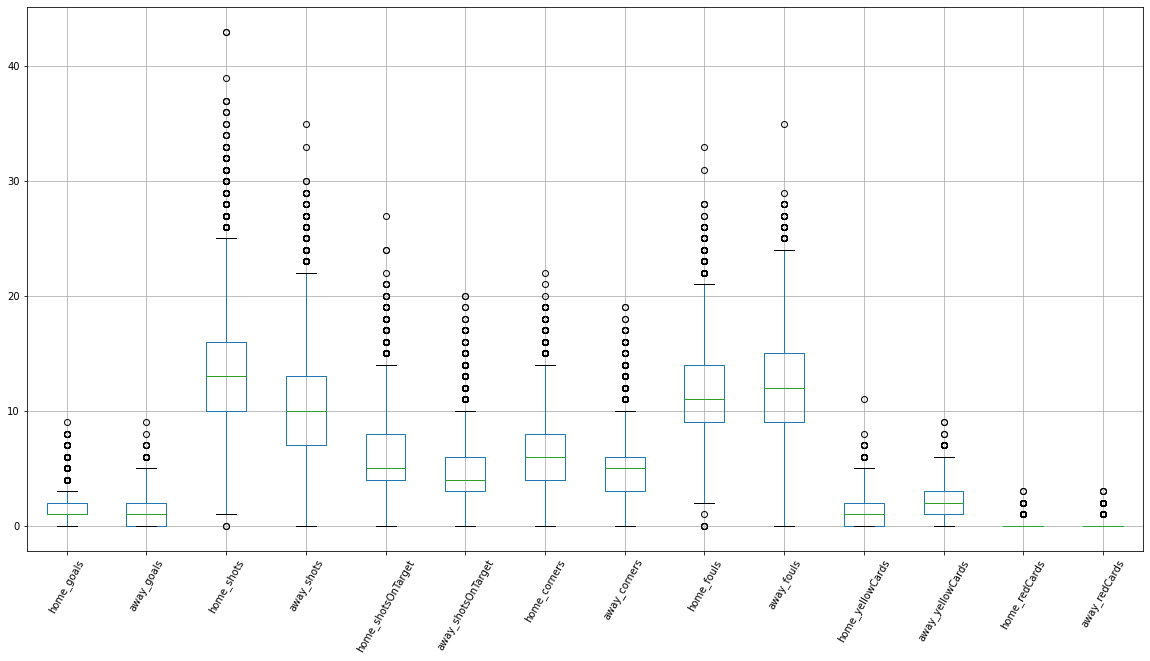

In [30]:
# Using boxplots to look for outliers
exclude_features = [
    "league",
    "season",
    "division",
    "odds_interwetten_homeWin",
    "odds_interwetten_draw",
    "odds_interwetten_awayWin",
    "odds_williamHill_homeWin",
    "odds_williamHill_draw",
    "odds_williamHill_awayWin"
]
feature_columns = [col for col in numeric_features if col not in exclude_features]
matches[feature_columns].boxplot(rot=60, figsize=(20,10))
plt.show()

These plots look reasonable and there are no clear incorrect values. There are quite a few circles representing outliers. It looks like this is due to the distributions being skewed rather than because the data is wrong.

The following extreme values are unlikely but still possible. A match where a team:
* scores 9 goals
* has no shots
* has 43 shots
* commits no fouls
* commits 35 fouls
* gets 11 yellow cards